# Linear Regression

Em estatística, a **regressão linear** é uma abordagem linear para modelar a relação entre uma resposta escalar e uma ou mais variáveis explicativas (também conhecidas como variáveis **dependentes** e **independentes**).

O caso de uma variável explicativa é chamado de regressão linear simples; para mais de um, o processo é chamado de regressão linear múltipla. Esse termo é diferente da regressão linear multivariada, em que várias variáveis dependentes correlacionadas são previstas, em vez de uma única variável escalar.

Na regressão linear, os relacionamentos são modelados usando funções de preditor linear cujos parâmetros de modelo desconhecidos são estimados a partir dos dados. Esses modelos são chamados de modelos lineares.

Mais detalhes no [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)

## Simple Linear Regression

Em estatística, a **regressão linear simples** é um modelo de regressão linear com uma única variável explicativa.

Ou seja, se refere a pontos de amostra bidimensionais com uma variável independente e uma variável dependente (convencionalmente, as coordenadas **x** e **y** em um sistema de coordenadas cartesianas) e encontra uma função linear (uma linha reta não vertical) que, com a maior precisão possível, prevê os valores da variável dependente como uma função da variável independente.

### Conjunto de Dados de Propaganda

Este conjunto de dados contém estatísticas sobre as vendas de um produto em 200 mercados diferentes, juntamente com orçamentos de publicidade em cada um desses mercados para diferentes canais de mídia: TV, rádio e jornal.

As vendas são em milhares de unidades e o orçamento em milhares de dólares.

Ele pode ser encontrado no [Kaggle](https://www.kaggle.com/ishaanv/ISLR-Auto)

Primeiramente vamos importar as bibliotecas necessárias para trabalharmos.

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Uma vez que temos os imports feitos, podemos carregar os dados com **pandas**.

In [2]:
df = pd.read_csv('dados/Advertising.csv')

Checamos os dados iniciais de nosso **DataFrame**.

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Nosso objetivo é encontrar se existe uma relação em quanto é gasto com propaganda com o resultado obtido em vendas.

Para facilitar o nosso trabalho, vamos criar uma coluna com o gasto total em propaganda, somando **TV**, **radio** e **newspaper**.

In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

E agora podemos novamente inspecionar os nossos dados.

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


Uma forma interessante de entendermos se há uma relação entre gasto total em propaganda e as vendas, é através de um gráfico.

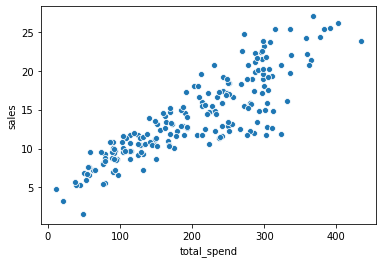

In [7]:
sns.scatterplot(data=df, x='total_spend', y='sales');

Intuitivamente podemos observar que quanto mais é investido em propaganda, mais as vendas aumentam.

Parece existir uma relação linear entre as duas variáveis.

Podemos usar a biblioteca **sns** para plotar essa linha de relação entre as duas variáveis.

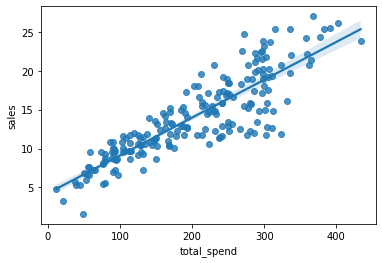

In [8]:
sns.regplot(data=df, x='total_spend', y='sales');

E agora podemos separar os nossos dados em **X** (features) e **y** (labels).

In [9]:
X = df['total_spend']
y = df['sales']

A função **polyfit()** nos permite então resolver a equação para obtermos os coeficientes da equação da reta.

$y = mx + b$

O parâmetro **deg** define o grau do polinômio, neste caso, estamos trabalhando com um polinômio de primeiro grau (linear).

$y = \beta_1 x + \beta_0$

In [11]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

Agora vamos usar esses coeficientes para fazer previsões.

Primeiramente iremos definir um array de potências valores de investimento em propaganda.

Em seguida, faremos previsões e plotamos os dados no gráfico juntamente com a reta.

In [12]:
potential_spend = np.linspace(0,500,100)

In [13]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

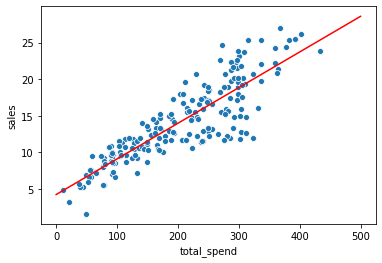

In [16]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red');

Observe que obtivemos o mesmo resultado que a biblioteca **sns** nos trouxe automaticamente.

Também podemos usar essa equação para fazer uma previsão única de um valor de investimento em propaganda, de forma a saber o seu potencial retorno em vendas.

Vejamos quantas milhares de vendas um investimento de 200 dólares pode trazer.

In [17]:
spend = 200
predicted_sale = 0.04868788 * spend + 4.24302822
predicted_sale

13.98060422

A função **polyfit()** também pode trabalhar com polinômios de graus superiores. 

Podemos definir, por exemplo, o parâmetro **deg** como **3** para obtermos os coeficientes de uma equação de 3º grau.

In [18]:
np.polyfit(X, y, deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

Dessa encontramos os coeficientes da equação:

$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1x + \beta_0$

Que podemos, novamente, usar para fazer previsões ao construirmos a equação final.

In [22]:
pot_spend = np.linspace(0,500,100)
pred_sales = 3.07615033e-07 * pot_spend**3 + -1.89392449e-04 * pot_spend**2 + 8.20886302e-02 * pot_spend + 2.70495053e+00

Novamente vamos plotar o gráfico para visualizarmos o resultado.

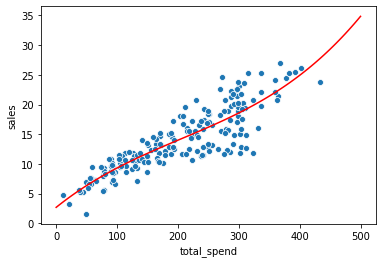

In [23]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(pot_spend, pred_sales, color='red');

É possível observarmos, de acordo com o gráfico, que conforme aumentamos o grau do polinômio, o resultado nos traz uma curva.

### Linear Regression com Scikit-Learn

Nesta seção, vamos expandir o nosso questionamento anterior para: "Qual é o relacionamento entre cada canal de propaganda (TV, radio, newspaper) e vendas?"

Ou seja, vamos usar mais **features** e não apenas uma.

Primeramente, vamos eliminar a coluna que criamos anteriormente chamada de **total_spend**.

In [26]:
df.drop('total_spend', axis=1, inplace=True)

E agora confirmamos que está tudo certo com os nossos dados.

In [27]:
df.head(8)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2


É importante visualizarmos a relação de cada canal de propaganda para adquirirmos uma intuição sobre eles.

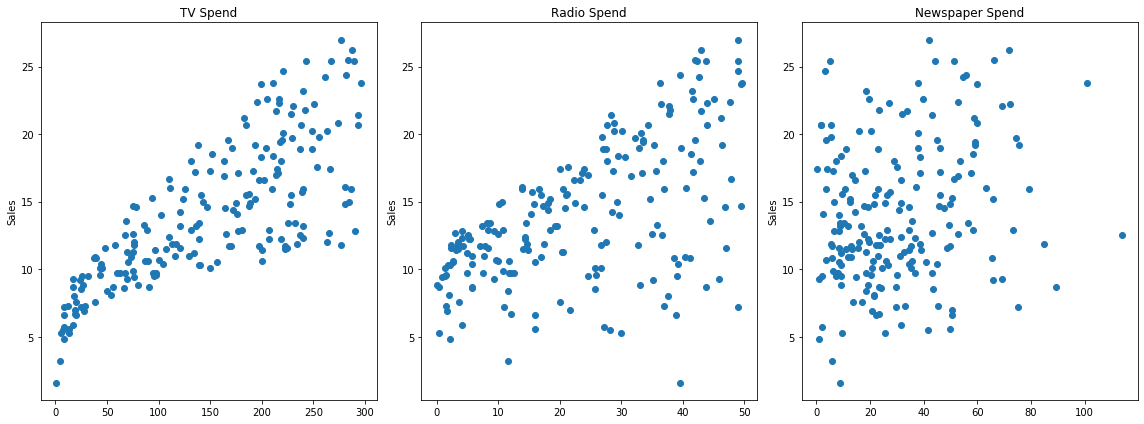

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_title('TV Spend')
axes[0].set_ylabel('Sales')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_title('Radio Spend')
axes[1].set_ylabel('Sales')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_title('Newspaper Spend')
axes[2].set_ylabel('Sales')

plt.tight_layout();

Com base neste gráfico, podemos ver que TV e Radio possuem uma correlação positiva, conforme aumentamos o seu investimento, as vendas sobem.

Porém para o newspaper, não fica muito óbvio.

Vamos então separar os nossos dados em **features** (X) e **labels** (y) para usarmos eles em nosso algoritmo.

In [32]:
X = df.drop('sales', axis=1)
y = df['sales']

E agora devemos dividir os dados em conjuntos de **treinamento** e **teste**.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Podemos ver o tamanho de nosso DataFrame com a função **len()**.

In [34]:
len(df)

200

São 200 entradas no total.

Se formos ver o conjunto de treinamento e teste, veremos que 70% dos dados foram reservados para o treinamento e 30% para o teste do algoritmo.

In [43]:
len(X_train) 

140

In [52]:
(70/100) * len(df)

140.0

In [45]:
len(X_test)

60

In [53]:
(30/100) * len(df)

60.0

Com nossos dados separados em dois conjuntos, devemos então criar o nosso modelo, também conhecido como estimador ou algoritmo.

Primeiramente importamos o modelo que desejamos trabalhar.

In [47]:
from sklearn.linear_model import LinearRegression

Uma vez que ele está importado, podemos obter ajuda sobre ele através da função **help()**.

In [48]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, optional, default True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

E agora devemos instanciar o modelo.

In [49]:
model = LinearRegression()

E com a função **fit()** treinamos o nosso modelo.

In [50]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

E agora que temos um modelo, podemos fazer previsões com ele.

In [51]:
y_hat = model.predict(X_test)
y_hat[:10]

array([18.91830292, 12.27408012, 10.36808194, 17.10673087, 14.82526767,
       13.13280904, 15.49114085,  3.48575804, 12.6709151 ,  7.66492411])

Uma vez que temos o modelo ajustado que é capaz de executar previsões baseadas em **features**, como podemos decidir se essas previsões são boas?

Felizmente, temos as labels de teste (**y_test**) para comparar os nossos resultados e sabermos se estamos indo bem.

Além disso, existem diferentes tipos de métricas que são capazes de indicar o desempenho de nosso modelo.

Vejamos como podemos utilizá-las.

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Vamos agora ver a média das vendas.

In [55]:
df['sales'].mean()

14.022500000000003

É interessante também visualizarmos as vendas em um gráfico de distribuição.

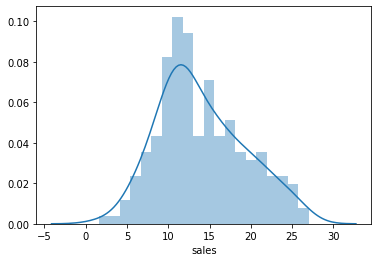

In [69]:
sns.distplot(df['sales'], bins=20);

E agora vamos calcular os erros usando a função **mean_absolute_error**.

In [70]:
mean_absolute_error(y_test, y_hat)

1.2852022591715133

Vamos calcular os erros usando a função **mean_squared_error**.

In [71]:
mean_squared_error(y_test, y_hat)

2.596955061518818

Vamos calcular os erros usando a métrica **root mean squared error**.

In [72]:
np.sqrt(mean_squared_error(y_test, y_hat))

1.6115070777129146

Muitas vezes para Regressão Linear é uma boa ideia avaliar separadamente os **residuals** $(y - \hat{y})$ e não apenas calcular as métricas de perfomance. (Exemplo: **RMSE**).

Vamos explorar se o nosso conjunto de dados de propaganda é realmente válido para ser solucionado por uma Regressão Linear, para isso, faremos análises dos **residuals** através de gráficos.

Para calcular os **residuals** de teste vamos subtrair **y_hat** de **y_test**.

Em um modelo perfeito nos seria retornado um array somente de **0**'s.

In [73]:
test_residuals = y_test - y_hat
test_residuals[:10]

68    -0.018303
179    0.325920
94     1.131918
64     0.893269
110   -1.425268
115   -0.532809
114   -0.891141
108    1.814242
2     -3.370915
65     1.635076
Name: sales, dtype: float64

E agora vamos plotar esses residuals com um **scatterplot**.

Os dados aparentam estar aleatoriamente distribuídos em nosso gráfico, o que é uma indicação de que eles estão apropriados para uma Regressão Linear.

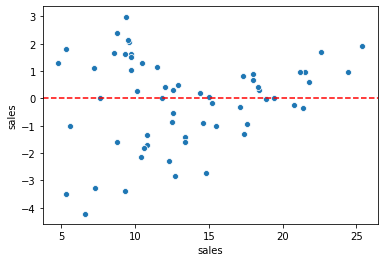

In [76]:
sns.scatterplot(x=y_test, y=test_residuals);
plt.axhline(y=0, color='red', ls='--');

Também é interessante vermos a distribuição dos residuals.

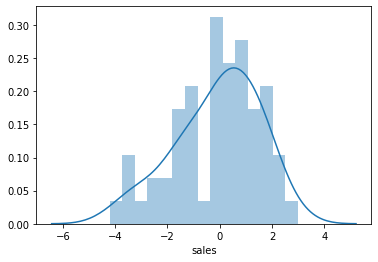

In [78]:
sns.distplot(test_residuals, bins=15, kde=True);

Outra forma de visualizarmos se os nossos dados estão aptos a serem resolvidos por uma Regressão Linear é através de um gráfico de probabilidade.

Essencialmente, a reta vermelha mostra como uma distribuição normal deve parecer.

Os pontos azuis não estão divergindo muito da reta vermelha, indicando que os nossos dados estão apropriados.

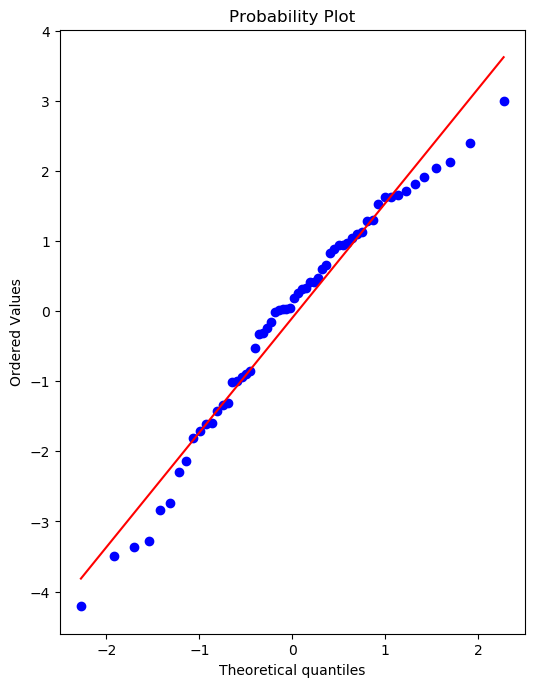

In [79]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)

Finalmente podemos salvar o nosso modelo para uso futuro.

Vamos usar a biblioteca **joblib**.

In [80]:
from joblib import dump, load

Salvando o modelo.

In [81]:
dump(model, 'modelos/linear_regression_sales.joblib')

['modelos/linear_regression_sales.joblib']

E agora podemos carregá-lo quando desejarmos.

In [83]:
loaded_model = load('modelos/linear_regression_sales.joblib')

Podemos verificar os coeficientes deste modelo carregado e confirmar que são os mesmos do nosso modelo treinado.

In [84]:
loaded_model.coef_

array([0.04562528, 0.19396584, 0.00395074])

In [85]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Perceba que os dois primeiros coeficientes (TV e radio) são significativamente maiores que o último (newspaper), indicando que a contribuição dos dois primeiros é maior para o aumenta de vendas.